In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse

# Excel 파일에서 데이터 불러오기 (주어진 코드 그대로 사용)
file_path = "C:/2023/8월/FIELD/2023_FIELD_Data 이준영.xlsx"
sheet_name = "Sheet3"

America_oilprice = pd.read_excel(file_path, sheet_name=sheet_name, usecols="H", skiprows=0, nrows=15)
Russia_oilprice = pd.read_excel(file_path, sheet_name=sheet_name, usecols="I", skiprows=0, nrows=15)
Saudi_oilprice = pd.read_excel(file_path, sheet_name=sheet_name, usecols="J", skiprows=0, nrows=15)
Russia_oil_p = pd.read_excel(file_path, sheet_name=sheet_name, usecols="B", skiprows=0, nrows=15)
America_oil_p = pd.read_excel(file_path, sheet_name=sheet_name, usecols="D", skiprows=0, nrows=15)
Total_oil_p = pd.read_excel(file_path, sheet_name=sheet_name, usecols="E", skiprows=0, nrows=15)
America_coal_ex = pd.read_excel(file_path, sheet_name=sheet_name, usecols="K", skiprows=0, nrows=15)

# 데이터 준비
data = pd.concat([America_oilprice, Russia_oilprice, Saudi_oilprice, Russia_oil_p, America_oil_p, Total_oil_p, America_coal_ex], axis=1)
data.columns = ["America_oilprice", "Russia_oilprice", "Saudi_oilprice", "Russia_oil_p", "America_oil_p", "Total_oil_p", "America_coal_ex"]

# 다변량 ARIMA 모델 훈련 및 예측
forecast_steps = 5
forecast_results = []

# 각 변수마다 다변량 ARIMA 모델을 적용하여 예측 수행
for col in data.columns:
    model = ARIMA(data[col], order=(1, 2, 1))  # ARIMA(1,1,1) 모델로 예시
    result = model.fit()
    forecast = result.forecast(steps=forecast_steps)
    forecast_results.append(forecast)

# 예측 결과 출력
forecast_results = np.array(forecast_results).T
forecast_df = pd.DataFrame(forecast_results, columns=data.columns)
print("다음 5기 예측:\n", forecast_df)


C:\Users\JYLEE\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\JYLEE\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\JYLEE\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


다음 5기 예측:
    America_oilprice  Russia_oilprice  Saudi_oilprice  Russia_oil_p  \
0         60.893298        68.939208       66.544926   9777.135451   
1         65.645530        75.470152       71.966813   9930.391506   
2         70.397810        82.000817       77.370859  10141.548957   
3         75.150089        88.531527       82.771816  10392.092543   
4         79.902367        95.062230       88.172237  10669.427669   

   America_oil_p   Total_oil_p  America_coal_ex  
0    8722.912511  72714.955173       667.426891  
1    7802.673515  71962.139886       695.997293  
2    6954.824921  71723.302546       713.873970  
3    6147.333906  71924.585713       734.283807  
4    5362.342199  72502.745092       754.093582  


C:\Users\JYLEE\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


### 전쟁 전


C:\Users\JYLEE\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


다음 5기 예측:
     America_oilprice  Russia_oilprice  Saudi_oilprice
15         59.442322        66.114746       65.594224
16         61.105856        67.980426       68.084713
17         62.034866        68.981097       69.651625
18         62.634655        69.574907       70.809178
19         63.086882        69.977350       71.785290


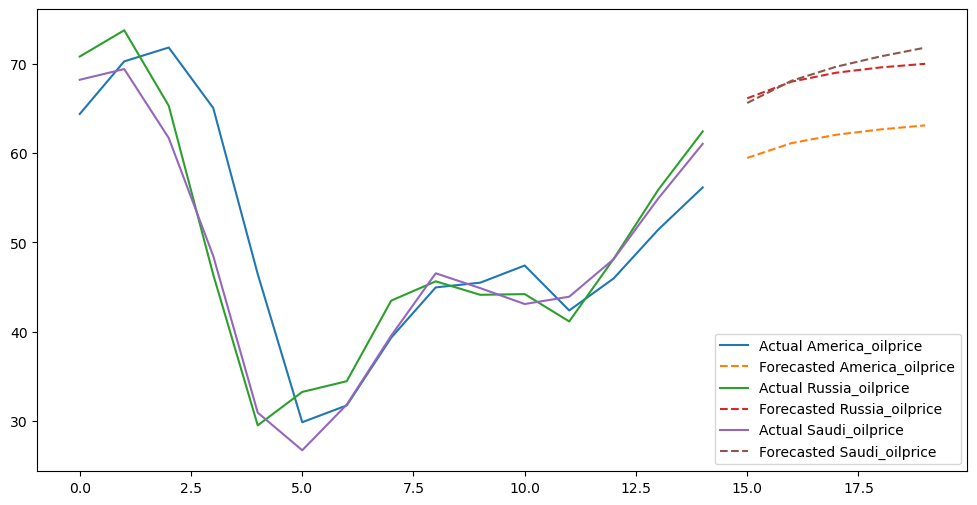

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt


# Excel 파일에서 데이터 불러오기 (주어진 코드 그대로 사용)
file_path = "C:/2023/8월/FIELD/2023_FIELD_Data 이준영.xlsx"
sheet_name = "Sheet3"

America_oilprice = pd.read_excel(file_path, sheet_name=sheet_name, usecols="H", skiprows=0, nrows=15)
Russia_oilprice = pd.read_excel(file_path, sheet_name=sheet_name, usecols="I", skiprows=0, nrows=15)
Saudi_oilprice = pd.read_excel(file_path, sheet_name=sheet_name, usecols="J", skiprows=0, nrows=15)

# 데이터 준비
data = pd.concat([America_oilprice, Russia_oilprice, Saudi_oilprice], axis=1)
data.columns = ["America_oilprice", "Russia_oilprice", "Saudi_oilprice"]

# 다변량 ARIMA 모델 훈련 및 예측
forecast_steps = 5
forecast_results = {}

# 각 변수마다 다변량 ARIMA 모델을 적용하여 예측 수행
for col in ["America_oilprice", "Russia_oilprice", "Saudi_oilprice"]:
    model = ARIMA(data[col], order=(1, 2, 2))  # ARIMA(1,2,1) 모델로 예시
    result = model.fit()
    forecast = result.forecast(steps=forecast_steps)
    forecast_results[col] = forecast

# 예측 결과 출력
forecast_df = pd.DataFrame(forecast_results)
print("다음 5기 예측:\n", forecast_df)

# 시각화
plt.figure(figsize=(12, 6))
for col in forecast_df.columns:
    plt.plot(data.index, data[col], label=f"Actual {col}")
    plt.plot(np.arange(len(data), len(data) + forecast_steps), forecast_df[col], label=f"Forecasted {col}", linestyle='dashed')

plt.legend()
plt.show()


### 전쟁 후

C:\Users\JYLEE\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\JYLEE\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\JYLEE\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


다음 5기 예측:
     America_oilprice  Russia_oilprice  Saudi_oilprice
27         98.498265        96.112196      100.970904
28        101.457225        98.470851      104.698700
29        103.692719       100.355018      107.070433
30        105.831811       102.067786      108.964912
31        107.958056       103.718640      110.691427


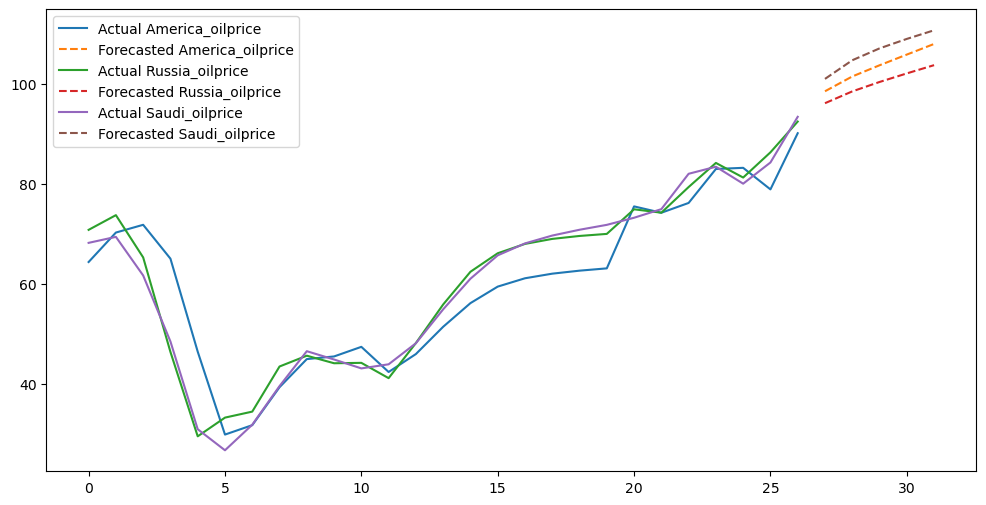

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt


# Excel 파일에서 데이터 불러오기 (주어진 코드 그대로 사용)
file_path = "C:/2023/8월/FIELD/2023_FIELD_Data 이준영.xlsx"
sheet_name = "Sheet3"

America_oilprice = pd.read_excel(file_path, sheet_name=sheet_name, usecols="H", skiprows=0, nrows=27)
Russia_oilprice = pd.read_excel(file_path, sheet_name=sheet_name, usecols="I", skiprows=0, nrows=27)
Saudi_oilprice = pd.read_excel(file_path, sheet_name=sheet_name, usecols="J", skiprows=0, nrows=27)

# 데이터 준비
data = pd.concat([America_oilprice, Russia_oilprice, Saudi_oilprice], axis=1)
data.columns = ["America_oilprice", "Russia_oilprice", "Saudi_oilprice"]

# 다변량 ARIMA 모델 훈련 및 예측
forecast_steps = 5
forecast_results = {}

# 각 변수마다 다변량 ARIMA 모델을 적용하여 예측 수행
for col in ["America_oilprice", "Russia_oilprice", "Saudi_oilprice"]:
    model = ARIMA(data[col], order=(1, 2, 2))  # ARIMA(1,2,1) 모델로 예시
    result = model.fit()
    forecast = result.forecast(steps=forecast_steps)
    forecast_results[col] = forecast

# 예측 결과 출력
forecast_df = pd.DataFrame(forecast_results)
print("다음 5기 예측:\n", forecast_df)

# 시각화
plt.figure(figsize=(12, 6))
for col in forecast_df.columns:
    plt.plot(data.index, data[col], label=f"Actual {col}")
    plt.plot(np.arange(len(data), len(data) + forecast_steps), forecast_df[col], label=f"Forecasted {col}", linestyle='dashed')

plt.legend()
plt.show()
